## What is tesseract:  
https://pypi.org/project/pytesseract/#:~:text=Python%2Dtesseract%20is%20an%20optical,the%20text%20embedded%20in%20images.&text=Additionally%2C%20if%20used%20as%20a,writing%20it%20to%20a%20file.  

Python-tesseract is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images. ... Additionally, if used as a script, Python-tesseract will print the recognized text instead of writing it to a file.

In [1]:
# Use Spacy wtth large model (lg) tobe compared with the previous team who used "small model (sm)"

# 1st: download using python3, instead of just "python" and then ... import
!python3 -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
# Install other libraries to convert scanned-pdf.
# Note: the pdfs are not conversion from docs file, but thet're scanned. That's why it needs OCR to convert


# PIL = Python Image Library
!pip3 install Pillow 

!pip3 install pytesseract
!pip3 install pdf2image
!sudo apt-get install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=a7688c72b7e16a935652690ed048fe7aa79a615afd6458d68de935e9e9fbe3aa
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [7]:
# Downloads the package lists from the repositories and "updates" them to get information on 
# the newest versions of packages and their dependencies. 

!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done


In [8]:
!apt-get install poppler-utils --fix-missing

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (165 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 146421 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [9]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os 
import re
import spacy

In [10]:
# Get filenames for pdf files. 
# I put only 5 sample pdfs, othrwise it takes a longer time

pdfs = [file for file in os.listdir() if '.pdf' in file]
pdfs

['125708363-Ferino-Sanchez-Seltik-A094-216-526-BIA-Jan-14-2013.pdf',
 '125709281-Keno-Bashae-Jumpp-A087-145-628-BIA-Jan-31-2013.pdf',
 '125483234-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Jan-18-2013.pdf',
 '125722233-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Aug-30-2012.pdf',
 '127010570-Raul-Bosveli-Garcia-Perez-A076-894-739-BIA-Jan-18-2013.pdf']

In [13]:
# Check the path to pdfs

# os.path.isdir('./temp/')
os.path.isdir('./')

True

In [15]:
def ocr_func(pdf_file, txt_folder = './temp/'):
    '''
    Takes an uploaded .pdf file, converts it to jpg  and to plain text, and saves it as a
    .txt file
    '''
    #update to recieve input .pdf file as a variable?

    pages = convert_from_path(pdf_file, dpi=300)

    num_pages = 0

    # convert to jpg
    for image_counter, page in enumerate(pages):
        filename = 'page_' + str(image_counter) + '.jpg'
        page.save(filename, 'JPEG')
        num_pages += 1
    if not os.path.isdir(txt_folder):
      os.mkdir(txt_folder)
    outfile = ''.join(['./temp/',pdf_file.split('.')[0], '.txt'])
    fulltext = []
    f = open(outfile, 'a')

    for i in range(num_pages):
        filename = 'page_' + str(i) + '.jpg'
        text = str(((pytesseract.image_to_string(Image.open(filename)))))
        
        os.remove(filename)
        # os.remove(pdf_file)

        # replace  "\n" to new line?
        text = text.replace('-\n', '') 

        # replace "\n" to space, but only just in case.
        # text = text.replace('\n', ' ')  #try not to use this
        fulltext.append(text)
        f.write(text)

    f.close()

    return (outfile[len(txt_folder):],''.join(fulltext).split('\n\n'))


In [19]:
def getJudge(text: list) -> tuple:
        '''
        In an appeal document, finds the name of the judge on the appeal
        returns a tuple of 'high confidence' or 'low confidence' 
        and the name of the judge
        If the word 'judge' is near the token, high confidence is returned
        This is because the judge name is followed or preceded by their title
        '''
        nlp = spacy.load('en_core_web_sm')
        spaceSepText = ' '.join(text)
        doc = nlp(spaceSepText)
        people = [ent for ent in doc.ents if ent.label_ == 'PERSON'
                        and len(ent.text.split(' ')) in (2,3)][-5:]

        print("print people", people)             ######################### TRIAL
        possibleJudges = [doc[person.start-4:person.end+4] for person in people]
        print("possible judges:", possibleJudges) ######################### TRIAL
        print("possible people:", people)         ######################### TRIAL
        for idx, tokens in enumerate(possibleJudges):
            if 'judge' in str(tokens).lower():
              return ('High confidence', people[idx])
        # return ('low confidence', max(sorted(people, key = len)))


def isAppeal(text):
  appeal = re.compile(r"(IN REMOVAL PROCEEDINGS\nAPPEAL($|\n)|\nAPPEAL\n)")
  return appeal.search('\n'.join(text))


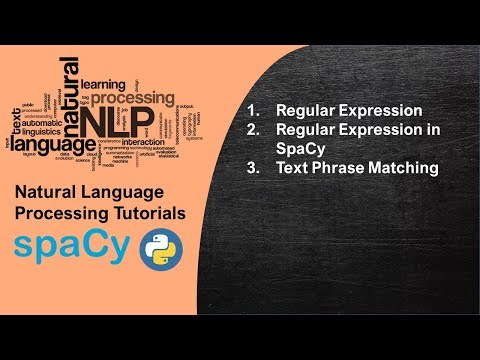

In [ ]:
# https://www.youtube.com/watch?v=08NbfA9od9w&ab_channel=KGPTalkie

from IPython.display import YouTubeVideo
YouTubeVideo('08NbfA9od9w')

In [20]:
"""
Court and its county
"""

def getCourt(text: list):
  nlp = spacy.load('en_core_web_sm')
  spaceSepText = ' '.join(text)
  doc = nlp(spaceSepText)
  court = [ent for ent in doc.ents if ent.label_ == 'GPE']
  print("print court :", court)
  return court[0].text + ', ' +  court[1].text

def getCoO(text: list):
#   nlp = spacy.load('en_core_web_sm')
  nlp = spacy.load('en_core_web_lg')
  spaceSepText = ' '.join(text)
  doc = nlp(spaceSepText)
  places = [ent for ent in doc.ents if ent.label_ == 'GPE']
  print("print places:", places)      #####################  TRIAL
  possibleCoO = [doc[place.start-4:place.end+4] for place in places]
  print("print possible CoO", possibleCoO)     ###############  TRIAL
  
  for idx, token in enumerate(possibleCoO):
    return max(sorted(places, key = len))


## Need to get:  
### Date of Notice,  
### Name of asylum seeker  
### Case number: A 037-xxxxx


In [23]:
"""
This part is the longest one. convert to JPG & text
"""

fullTextList = [ocr_func(PDF_file) for PDF_file in pdfs]
for file, text in fullTextList:
  print("file: ", file)
  print(text[:20])

file:  125708363-Ferino-Sanchez-Seltik-A094-216-526-BIA-Jan-14-2013.txt
[' ', 'Sweeney, Maureen A., Esquire', 'University of Maryland Immigration Clinic\n500 W. Baltimore Street, Suite 360\nBaltimore, MD 21201', 'Name: SELTIK, FERINO SANCHEZ\nRiders:094-216-523', 'U.S. Department of Justice\nExecutive Office for Immigration Review', 'Board of Immigration Appeals\nOffice of the Clerk', '3107 Leesburg Pike, Suite 2000\nFails Church, Virginia 22041', 'DHS/ICE Office of Chief Counsel - BAL\n31 Hopkins Plaza, Room 1600\nBaltimore, MD 21201', 'A 094-216-526', 'Date of this notice: 1/24/2013', "Enclosed is a copy of the Board's decision and order in the above-referenced case.", 'Sincerely,', 'Donna Cans', 'Donna Carr\nChief Clerk\nEnclosure\nPanel Members:\nGuendelsberger, John\nAdkins-Blanch, Charles K.\nManuel, Elise L.\nTranc', 'Userteam: Docket', 'Cite as: Ferino Sanchez Seltik, A094 216 526 (BIA Jan. 14, 2013)', 'poUDeIT MMM | Jayuas ayerjaddy seSnjay 2p yuRISTUUTT\n\x0cU.S. Department o

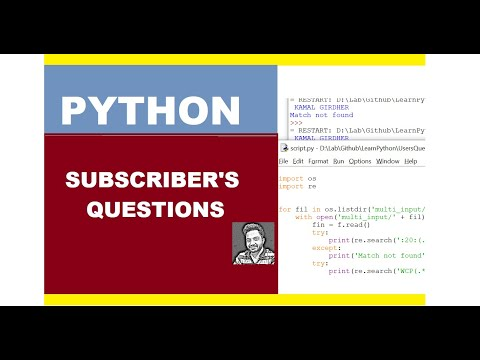

In [ ]:
# https://www.youtube.com/watch?v=pFTjOTkbXiU&ab_channel=ExtremeAutomation-KamalGirdher

from IPython.display import YouTubeVideo
YouTubeVideo('pFTjOTkbXiU')

In [ ]:
appeals = []
originals = []
print("length of full text: ",len(fullTextList))
for fullText in fullTextList:
  print('\nfull text:', fullText[0])
  if isAppeal(fullText[1]):
    print("Case type:", 'Appeal Case')
    judge = getJudge(fullText[1])
    print('Judge name:', judge)
    court = getCourt(fullText[1])
    print('Court', court)
    coo = getCoO(fullText[1])
    print('Country of origin', coo)
    if fullText not in appeals:
      appeals.append(fullText)
  else:
    print("Case type:", 'Original Case')
    judge = getJudge(fullText[1])
    print('Judge name: ', judge)
    court = getCourt(fullText[1])
    print('Court: ', court)
    coo = getCoO(fullText[1])
    print('Country of origin: ', coo)
    if fullText not in originals:
      originals.append(fullText)
    
    # for x in fullText[1]:
    #   print(x)



length of full text:  5

full text: 127010570-Raul-Bosveli-Garcia-Perez-A076-894-739-BIA-Jan-18-2013.txt
Case type: Appeal Case
Judge name: None
print court : [Houston, Falls Church, Virginia, Atlanta, Atlanta, Guatemala, Ocampo, Lozada, xemoval, Homeland, United States]
Court Houston, Falls Church
Country of origin United States

full text: 125708363-Ferino-Sanchez-Seltik-A094-216-526-BIA-Jan-14-2013.txt
Case type: Appeal Case
Judge name: ('High confidence', DAVID W. CROSLAND)
print court : [Baltimore, Fails Church, Virginia, Baltimore, Virginia, Baltimore, U.S., Baltimore, Maryland, Mexico, Mexico, the United States, Mexico, the United States, the United States, Mexico, Baltimore, Maryland]
Court Baltimore, Fails Church
Country of origin Maryland

full text: 125483234-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Jan-18-2013.txt
Case type: Original Case
Judge name:  None
print court : [Los Angeles, Falls Church, Virginia, Los Angeles, Los Angeles, California]
Court:  Los Angeles, Falls 

In [ ]:
"""
# Try t copy the above cell.
# Goal:
# Put every parameter in a list
"""

appeals = []
originals = []
print("length of full text: ",len(fullTextList))
for fullText in fullTextList:
  print('\nfull text:', fullText[0])
  if isAppeal(fullText[1]):
    print("Case type:", 'Appeal Case')
    judge = getJudge(fullText[1])
    print('Judge name:', judge)
    court = getCourt(fullText[1])
    print('Court:', court)
    coo = getCoO(fullText[1])
    print('Country of origin:', coo)
    if fullText not in appeals:
      appeals.append(fullText)
  else:
    print("Case type:", 'Original Case')
    judge = getJudge(fullText[1])
    print('Judge name: ', judge)
    court = getCourt(fullText[1])
    print('Court: ', court)
    coo = getCoO(fullText[1])
    print('Country of origin: ', coo)
    if fullText not in originals:
      originals.append(fullText)
    
    # for x in fullText[1]:
    #   print(x)



length of full text:  5

full text: 127010570-Raul-Bosveli-Garcia-Perez-A076-894-739-BIA-Jan-18-2013.txt
Case type: Appeal Case
Judge name: None
print court : [Houston, Falls Church, Virginia, Atlanta, Atlanta, Guatemala, Ocampo, Lozada, xemoval, Homeland, United States]
Court: Houston, Falls Church
Country of origin: United States

full text: 125708363-Ferino-Sanchez-Seltik-A094-216-526-BIA-Jan-14-2013.txt
Case type: Appeal Case
Judge name: ('High confidence', DAVID W. CROSLAND)
print court : [Baltimore, Fails Church, Virginia, Baltimore, Virginia, Baltimore, U.S., Baltimore, Maryland, Mexico, Mexico, the United States, Mexico, the United States, the United States, Mexico, Baltimore, Maryland]
Court: Baltimore, Fails Church
Country of origin: Maryland

full text: 125483234-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Jan-18-2013.txt
Case type: Original Case
Judge name:  None
print court : [Los Angeles, Falls Church, Virginia, Los Angeles, Los Angeles, California]
Court:  Los Angeles, Fa

In [ ]:
fullText[1]

[' ',
 'Ortega, Hector R., Esq',
 'Ortega, Canossa & Associates, PLC\n315 W. 9th St., Suite 613',
 'Los Angeles, CA 90015',
 'Name: HERNANDEZ AVILA, NOE CESAR',
 'U.S. Department of Justice\nExecutive Office for Immigration Review',
 'Board of Immigration Appeals\nOffice of the Clerk',
 '5107 Leesburg Pike, Suite 2000\nFalls Church, Virginia 22041',
 'DHS/ICE Office of Chief Counsel - LOS\n606 S. Olive Street, 8th Floor\nLos Angeles, CA 90014',
 'A 079-531-484',
 'Date of this notice: 8/30/2012',
 "Enclosed is a copy of the Board's decision and order in the above-referenced case.",
 'Sincerely,',
 'Denna Cary',
 'Donna Carr\nChief Clerk\nEnclosure\nPanel Members:\nCole, Patricia A.\ntucasd',
 'Userteam: Docket',
 'Cite as: Noe Cesar Hernandez-Avila, A079 531 484 (BIA Aug. 30, 2012)',
 "pOU'DeIT MMM | JayUaD ayeTjaddy sesnjay 29 JueIsTUIWT\n\x0cU.S. Department of Justice Decision of the Board of Immigration Appeals\nExecutive @ffice for Immigration Review",
 '; Falls Church, Virginia 22

In [ ]:
# originals[3][1]
originals

[('125483234-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Jan-18-2013.txt',
  [' ',
   'Ortega, Hector R., Esq.',
   'Ortega, Canossa & Associates, PLC\n315 W. 9th St., Suite 613',
   'Los Angeles, CA 90015',
   'Name: HERNANDEZ AVILA, NOE CESAR',
   'U.S. Department of Justice\nExecutive Office for Immigration Review',
   'Board of Immigration Appeals\nOffice of the Clerk',
   '5107 Leesburg Pike, Suite 2000\nFalls Church, Virginia 22041',
   'DHS/ICE Office of Chief Counsel - LOS\n606 S. Olive Street, 8th Floor\nLos Angeles, CA 90014',
   'A 079-531-484',
   'Date of this notice: 1/18/2013',
   "Enclosed is a copy of the Board's decision and order in the above-referenced case.",
   'Sincerely,',
   'Donna Carr\nChief Clerk',
   'Enclosure',
   'Panel Members:\nCole, Patricia A.',
   'ines',
   'Userteam: Docket',
   'Cite as: Noe Cesar Hernandez-Avila, A079 531 484 (BIA Jan. 18, 2013)',
   "pOU'IeIT MMM | JayUaD ayeT[Jaddy sasnyjay 2p yuRISTUTUT\n\x0cU.S. Department of Justice Decision

In [ ]:
originals[0][1]

[' ',
 'Ortega, Hector R., Esq.',
 'Ortega, Canossa & Associates, PLC\n315 W. 9th St., Suite 613',
 'Los Angeles, CA 90015',
 'Name: HERNANDEZ AVILA, NOE CESAR',
 'U.S. Department of Justice\nExecutive Office for Immigration Review',
 'Board of Immigration Appeals\nOffice of the Clerk',
 '5107 Leesburg Pike, Suite 2000\nFalls Church, Virginia 22041',
 'DHS/ICE Office of Chief Counsel - LOS\n606 S. Olive Street, 8th Floor\nLos Angeles, CA 90014',
 'A 079-531-484',
 'Date of this notice: 1/18/2013',
 "Enclosed is a copy of the Board's decision and order in the above-referenced case.",
 'Sincerely,',
 'Donna Carr\nChief Clerk',
 'Enclosure',
 'Panel Members:\nCole, Patricia A.',
 'ines',
 'Userteam: Docket',
 'Cite as: Noe Cesar Hernandez-Avila, A079 531 484 (BIA Jan. 18, 2013)',
 "pOU'IeIT MMM | JayUaD ayeT[Jaddy sasnyjay 2p yuRISTUTUT\n\x0cU.S. Department of Justice Decision of the Board of Immigration Appeals\nExecutive Office for Immigration Review",
 'Falls Church, Virginia_22041',
 

In [ ]:
import pandas as pd

In [ ]:

# originals.to_csv('origin.csv', sep = '\n', index = False)

In [ ]:
appeals

[('127010570-Raul-Bosveli-Garcia-Perez-A076-894-739-BIA-Jan-18-2013.txt',
  [' ',
   'Almas, Aseph',
   'Law Offices of Aseph Almas,PLLC\nP.O. Box 11846',
   'Houston, TX 77293',
   'Name: GARCIA PEREZ, RAUL BOSVELI',
   'U.S. Department of Justice\nExecutive Office for Immigration Review',
   'Board of Immigration Appeals\nOffice of the Clerk',
   '5107 Leesburg Pike, Suite 2000\nFalls Church, Virginia 2204]',
   'DHS/ICE Office of Chief Counsel - ATL\n180 Spring Street, Suite 332\nAtlanta, GA 30303',
   'A 076-894-739',
   'Date of this notice: 1/18/2013',
   "Enclosed is a copy of the Board's decision and order in the above-referenced case.",
   'Sincerely,',
   'Donna Carr\nChief Clerk\nEnclosure\nPanel Members:\nManuel, Elise L.\nAdkins-Blanch, Charles K.\nHoffman, Sharon\nTranc',
   'Userteam: Docket',
   'Cite as: Raul Bosveli Garcia Perez, A076 894 739 (BIA Jan. 18 2013)',
   "pOU'IeIT MMM | JayUaD ayeT[Jaddy sasnjay 29 yueISTUTUW]\n\x0cU.S. Department of Justice Decision of th

In [ ]:
# Print the filename in txt


# for name, t in appeals or original:
#   print(name)

In [ ]:
# Convert text to DataFrame

import pandas as pd

df_original = pd.DataFrame(originals)
df_original.head(9)

,0,1
0,125483234-Noe-Cesar-Hernandez-Avila-A079-531-4...,"[ , Ortega, Hector R., Esq., Ortega, Canossa &..."


In [ ]:
# convert dataframe into csv. Testing

df_original.to_csv('original.csv', index = False, header=True)

In [ ]:
# import shutil

# #using make_archive method to zip a whole directory
# shutil.make_archive('texts', 'zip', './temp/')


In [ ]:
docs = []
for text in appeals or originals:
  docs.append([ent for ent in nlp(' '.join(text[1])).ents])# if ent.label_ == 'PERSON'])

In [ ]:
docs[3]

[Ortega,
 Hector R.,,
 Esq Ortega,
 Canossa & Associates,
 PLC,
 315,
 613,
 Los Angeles,
 NOE CESAR U.S. Department,
 Executive Office for Immigration Review Board of Immigration Appeals,
 Leesburg Pike,
 2000,
 Falls Church,
 Virginia,
 DHS/ICE Office of Chief Counsel - LOS,
 606,
 S. Olive Street,
 8th,
 Los Angeles,
 90014,
 079,
 8/30/2012,
 Denna Cary Donna Carr,
 Cole,
 Patricia A.,
 Docket Cite,
 Noe Cesar Hernandez-Avila,
 531 484,
 Aug. 30, 2012,
 29,
 U.S. Department of Justice,
 the Board of Immigration Appeals,
 Executive @ffice for Immigration Review,
 Falls Church,
 Virginia,
 531,
 484,
 Los Angeles,
 NOE CESAR HERNANDEZ,
 Hector R. Ortega,
 Elena Kusky,
 I&N Act,
 8,
 1227(a)(2)(A)(i)I,
 El Salvador,
 United States,
 The Department of Homeland Security,
 May 27, 2011,
 November 20.,
 CIMT,
 the Immigration and Nationality Act,
 8,
 5 years,
 | year,
 29,
 653w(a)(1,
 Noe Cesar Hernandez-Avila,
 531 484,
 Aug. 30, 2012,
 31,
 484,
 Count | of the Felony Complaint,
 DHS,

In [ ]:
docs

[[Aseph Law Offices,
  PLLC,
  Houston,
  RAUL BOSVELI U.S. Department,
  Executive Office for Immigration Review Board of Immigration Appeals,
  Leesburg Pike,
  2000,
  Falls Church,
  Virginia,
  DHS/ICE Office of Chief Counsel - ATL,
  180,
  Spring Street,
  Suite 332,
  Atlanta,
  GA,
  076,
  1/18/2013,
  Board,
  Donna Carr,
  Manuel,
  Elise L.,
  Charles K.,
  Hoffman,
  Sharon,
  Docket Cite,
  Raul,
  Garcia Perez,
  Jan. 18 2013,
  29,
  U.S. Department of Justice Decision of the Board of Immigration Appeals,
  Atlanta,
  GA Date,
  Aseph Almas,
  Ozlem B. Barnard,
  Guatemala,
  October 28, 2010,
  section 240B(a,
  the Immigration and Nationality Act,
  8,
  1229c(a,
  8,
  8,
  1003.1(d)(3)(ii,
  the Department of Homeland Security’s,
  8,
  1240.26(b)(1)(i)(D,
  Ocampo,
  22,
  Dec. 1301,
  2000,
  8C.F.R.§ 1003.3(a)(1,
  Shih,
  20,
  I&N,
  Dec. 697,
  1993,
  the Immigration Judge,
  the Immigration Judge,
  8,
  66,
  Raul,
  Garcia Perez,
  Jan. 18 2013,
  yuRISTU

In [ ]:
fullpeopleLists = []
for doc in docs:
  people = []
  for ent in doc:
    if ent.label_ == 'PERSON':
      people.append(ent.text)
  fullpeopleLists.append(people)


In [ ]:
for idx, peopleList in enumerate(fullpeopleLists):
  print("\nfile_name: ",  fullTextList[idx][0][:])
  if any([len(person.split(' ')) >= 3 for person in peopleList[-3:]]):
    print(peopleList[-3:])
    last = peopleList[-3:]
    print(max(last, key = len) )
  else:
    print('not found')
    print(peopleList[-3:])



file_name:  127010570-Raul-Bosveli-Garcia-Perez-A076-894-739-BIA-Jan-18-2013.txt
not found
['yueISTUTWT', 'Vol', 'DVISALS WAIVED']

file_name:  125708363-Ferino-Sanchez-Seltik-A094-216-526-BIA-Jan-14-2013.txt
['DAVID W. CROSLAND', 'Kristen J. Be tti', 'Jayuas']
DAVID W. CROSLAND

file_name:  125483234-Noe-Cesar-Hernandez-Avila-A079-531-484-BIA-Jan-18-2013.txt
['Michelle M. Odio', 'Jayuas', 'Maria Lopez- Cae Reape']
Maria Lopez- Cae Reape

file_name:  125709281-Keno-Bashae-Jumpp-A087-145-628-BIA-Jan-31-2013.txt
not found
['Respondent', 'Silva-Treving', 'Silva-Trevino']


In [ ]:
placeList = []
for doc in docs:
  places = []
  for ent in doc:
    if ent.label_ == 'GPE':
      places.append(ent.text)
  placeList.append(places)

In [ ]:
#getCourt(original[0][1])
# getCoO(appeals[0][0])


In [ ]:
'title\n'


'title\n'